In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from plotnine import *
import itertools
#from nilearn import image, plotting, datasets
#import nibabel as nib
import pdb
import os
import warnings
warnings.filterwarnings("ignore")

curr_dir = '/user_data/vayzenbe/GitHub_Repos/ginn'
data_dir = f"/lab_data/behrmannlab/vlad/ginn/modelling"
results_dir = f'{curr_dir}/results'
#training info
model_archs = ['cornet_z_sl']
vid = 'DM-clip'
'''
set model params
'''

train_types = ['random','imagenet_noface', 'imagenet_oneface', 'imagenet_vggface', 'vggface_oneobject', 'vggface']
ages = [ '5', '6', '7','8', 'adult']
train_dir = f'/lab_data/behrmannlab/image_sets/'
#n_classes = len(glob(f'{args.data}/train/*'))
#layer =['aIT','pIT'] #set in descending order
rois = ['LO', 'FFA']
layer_types = ['aIT', 'aIT']

lLO


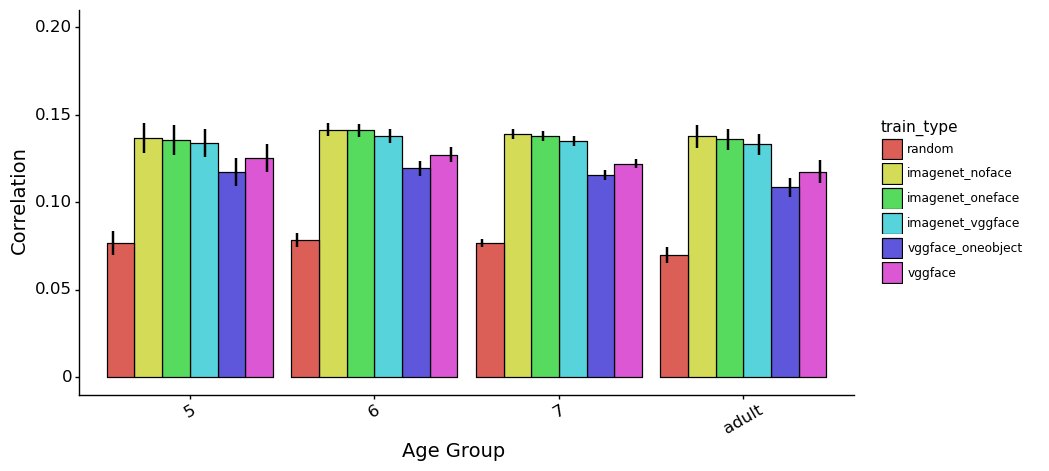


    target_age target_roi layer         train_type      corr        se
12           5        lLO   aIT    imagenet_noface  0.136674  0.008816
13           5        lLO   aIT   imagenet_oneface  0.135516  0.008383
14           5        lLO   aIT   imagenet_vggface  0.133776  0.008193
15           5        lLO   aIT             random  0.076638  0.006782
16           5        lLO   aIT            vggface  0.125282  0.008214
17           5        lLO   aIT  vggface_oneobject  0.117120  0.008093
84           6        lLO   aIT    imagenet_noface  0.141487  0.003813
85           6        lLO   aIT   imagenet_oneface  0.141154  0.003740
86           6        lLO   aIT   imagenet_vggface  0.137804  0.003874
87           6        lLO   aIT             random  0.078547  0.003986
88           6        lLO   aIT            vggface  0.127146  0.004183
89           6        lLO   aIT  vggface_oneobject  0.119318  0.004316
156          7        lLO   aIT    imagenet_noface  0.138912  0.002878
157  

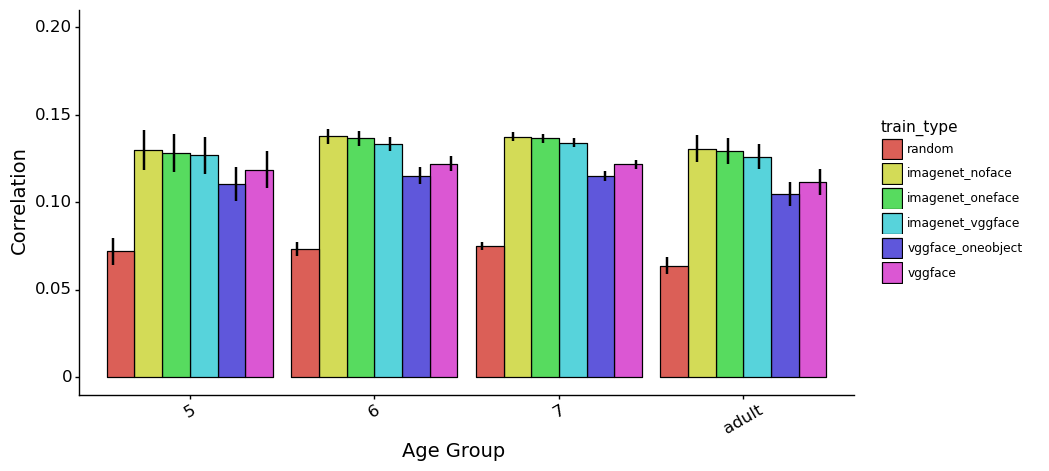


    target_age target_roi layer         train_type      corr        se
48           5        rLO   aIT    imagenet_noface  0.129859  0.011254
49           5        rLO   aIT   imagenet_oneface  0.128139  0.010841
50           5        rLO   aIT   imagenet_vggface  0.126806  0.010590
51           5        rLO   aIT             random  0.071983  0.007590
52           5        rLO   aIT            vggface  0.118630  0.010533
53           5        rLO   aIT  vggface_oneobject  0.110340  0.009700
120          6        rLO   aIT    imagenet_noface  0.137716  0.004309
121          6        rLO   aIT   imagenet_oneface  0.136620  0.004230
122          6        rLO   aIT   imagenet_vggface  0.133296  0.004251
123          6        rLO   aIT             random  0.073306  0.003954
124          6        rLO   aIT            vggface  0.122042  0.004457
125          6        rLO   aIT  vggface_oneobject  0.115242  0.004715
192          7        rLO   aIT    imagenet_noface  0.137516  0.002668
193  

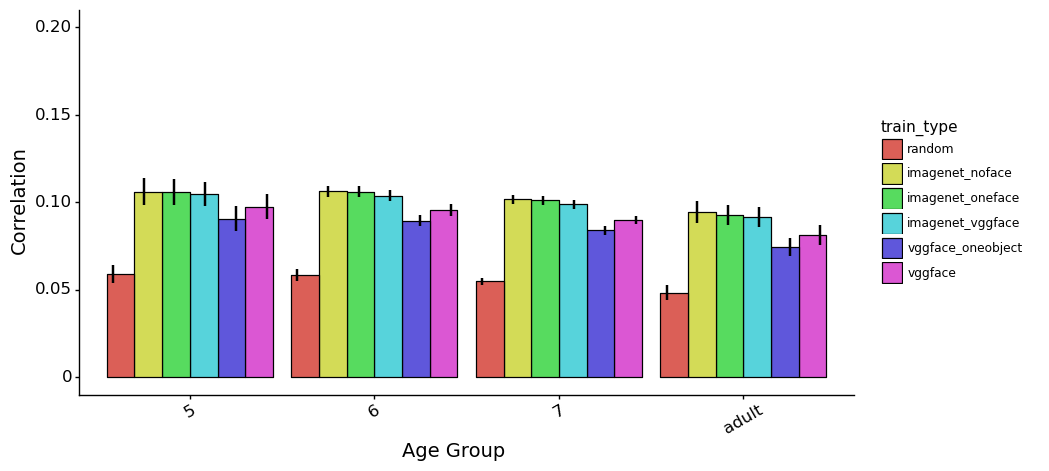


    target_age target_roi layer         train_type      corr        se
0            5       lFFA   aIT    imagenet_noface  0.106093  0.007528
1            5       lFFA   aIT   imagenet_oneface  0.105856  0.007224
2            5       lFFA   aIT   imagenet_vggface  0.104727  0.007029
3            5       lFFA   aIT             random  0.059214  0.005128
4            5       lFFA   aIT            vggface  0.097377  0.007157
5            5       lFFA   aIT  vggface_oneobject  0.090680  0.007006
72           6       lFFA   aIT    imagenet_noface  0.106185  0.003124
73           6       lFFA   aIT   imagenet_oneface  0.105907  0.003165
74           6       lFFA   aIT   imagenet_vggface  0.103577  0.003123
75           6       lFFA   aIT             random  0.058377  0.003255
76           6       lFFA   aIT            vggface  0.095790  0.003385
77           6       lFFA   aIT  vggface_oneobject  0.089542  0.003364
144          7       lFFA   aIT    imagenet_noface  0.101776  0.002598
145  

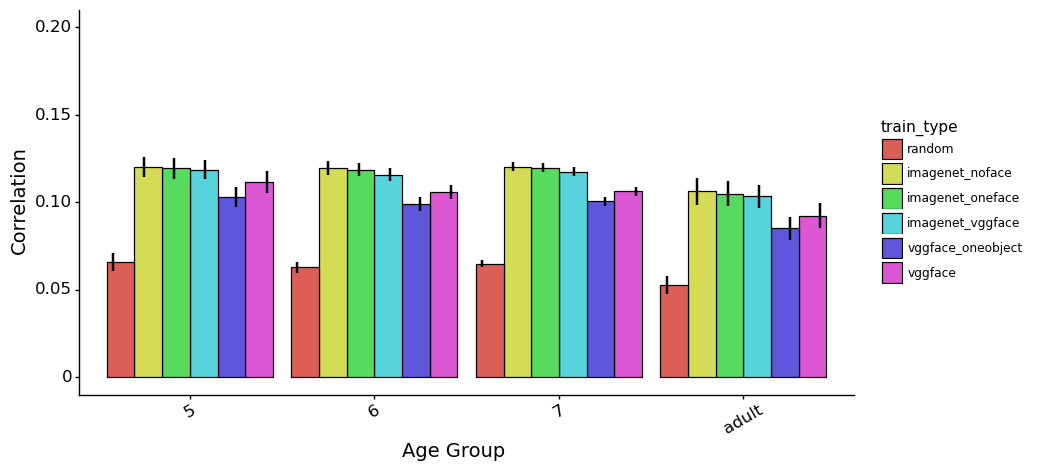


    target_age target_roi layer         train_type      corr        se
36           5       rFFA   aIT    imagenet_noface  0.120082  0.005862
37           5       rFFA   aIT   imagenet_oneface  0.119473  0.006021
38           5       rFFA   aIT   imagenet_vggface  0.118691  0.005568
39           5       rFFA   aIT             random  0.065788  0.005245
40           5       rFFA   aIT            vggface  0.111582  0.006066
41           5       rFFA   aIT  vggface_oneobject  0.103022  0.005786
108          6       rFFA   aIT    imagenet_noface  0.119472  0.003883
109          6       rFFA   aIT   imagenet_oneface  0.118666  0.003801
110          6       rFFA   aIT   imagenet_vggface  0.115730  0.003831
111          6       rFFA   aIT             random  0.062842  0.003270
112          6       rFFA   aIT            vggface  0.105771  0.003894
113          6       rFFA   aIT  vggface_oneobject  0.098946  0.003907
180          7       rFFA   aIT    imagenet_noface  0.120247  0.002671
181  

In [7]:
"""
RSA using each individual
"""
exp = 'rsa'
df = pd.read_csv(f'{results_dir}/{exp}/cornet_z_sl_individual_rsa_summary.csv')
df = df[df['target_age'] != 'lOFA']
df = df[df['target_age'] != 'rOFA']

df['target_age'] = df['target_age'].apply(np.floor).astype(int)
df['target_age'][df['target_age'] >= 18] = 18
df['target_age'][df['target_age'] == 8] = 7
df['target_age'] = df['target_age'].astype(str)
df['target_age'][df['target_age']== '18'] = 'adult' 

curr_df = df.groupby(["target_age", "target_roi",'layer','train_type']).mean().reset_index()
curr_df['se'] = df.groupby(["target_age", "target_roi",'layer','train_type']).sem().reset_index()['corr']


for roi_vals in enumerate(rois):
    for lr in ['l','r']:
        roi = f'{lr}{roi_vals[1]}'
        print(roi)
        layer = layer_types[roi_vals[0]]
        summary_df = curr_df[(curr_df['target_roi'] == roi) & (curr_df['layer'] == layer)]
        summary_df['target_age'] = pd.Categorical(summary_df['target_age'], categories = ages, ordered = False)
        summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_types, ordered = False)


        
        
        plot = ggplot(summary_df, aes(x = 'target_age', y = 'corr', fill = 'train_type')) + \
            geom_col(stat='identity',color = 'black', position='dodge') + theme_classic() + \
            xlab('Age Group') + ylab('Correlation') + ylim(0, 0.2) + \
            geom_linerange(aes(x='target_age',  ymax = 'corr + se', ymin = 'corr - se'), size = 1, position=position_dodge2(width=1)) + \
            theme(text = element_text(color ='black'), 
                axis_text_x= element_text(angle = 30, size = 12),
                axis_text_y= element_text(size = 12),
                axis_title=element_text(size = 14),
                axis_line=element_line(), 
                panel_border=element_blank(),
                figure_size = (10, 5))

        print(plot)
        del plot

        

In [1]:
'''
Plot model MVPD
'''
exp = 'mvpd'


for model_arch in model_archs:
    
    df = pd.read_csv(f'{results_dir}/{exp}/model_{model_arch}_summary.csv')
    
    df['age'] = df['age'].apply(np.floor).astype(int)
    df['age'][df['age'] >= 18] = 18
    df['age'] = df['age'].astype(str)
    df['age'][df['age']== '18'] = 'adult' 

    curr_df = df.groupby(["age", "roi",'layer','train_type']).mean().reset_index()
    curr_df['se'] = df.groupby(["age", "roi",'layer','train_type']).sem().reset_index()['r2']

    for roi_vals in enumerate(rois):
        for lr in ['l','r']:
            roi = f'{lr}{roi_vals[1]}'
            layer = layer_types[roi_vals[0]]
            summary_df = curr_df[(curr_df['roi'] == roi) & (curr_df['layer'] == layer)]
            summary_df['age'] = pd.Categorical(summary_df['age'], categories = ages, ordered = False)
            summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_types, ordered = False)


            print([model_arch, roi])
            
            plot = ggplot(summary_df, aes(x = 'age', y = 'r2', fill = 'train_type')) + \
                geom_col(stat='identity',color = 'black', position='dodge') + theme_classic() + \
                xlab('Age Group') + ylab('Variance Explained (%)') + ylim(0, 0.5) + \
                geom_linerange(aes(x='age',  ymax = 'r2 + se', ymin = 'r2 - se'), size = 1, position=position_dodge2(width=1)) + \
                theme(text = element_text(color ='black'), 
                    axis_text_x= element_text(angle = 30, size = 12),
                    axis_text_y= element_text(size = 12),
                    axis_title=element_text(size = 14),
                    axis_line=element_line(), 
                    panel_border=element_blank(),
                    figure_size = (10, 5))

            print(plot)
            del plot

        

NameError: name 'model_archs' is not defined

['cornet_z_sl', 'lLO']


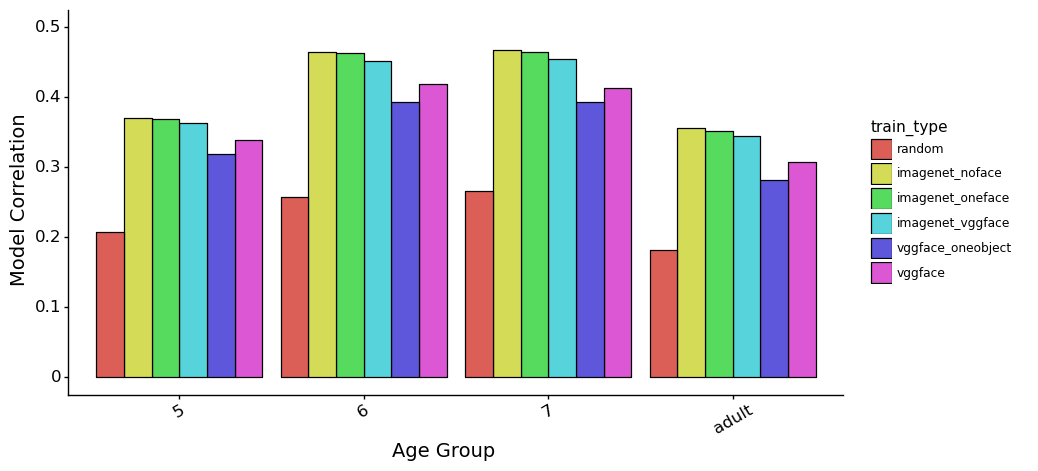


['cornet_z_sl', 'rLO']


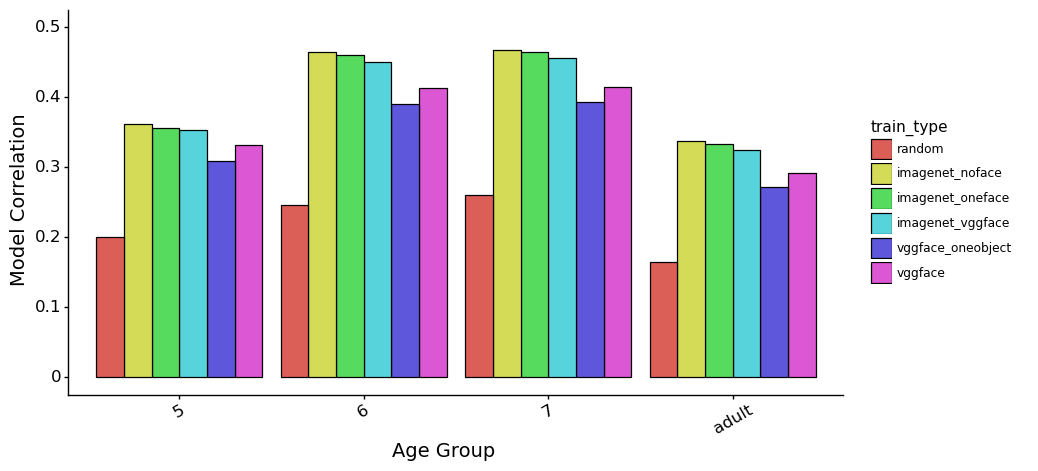


['cornet_z_sl', 'lFFA']


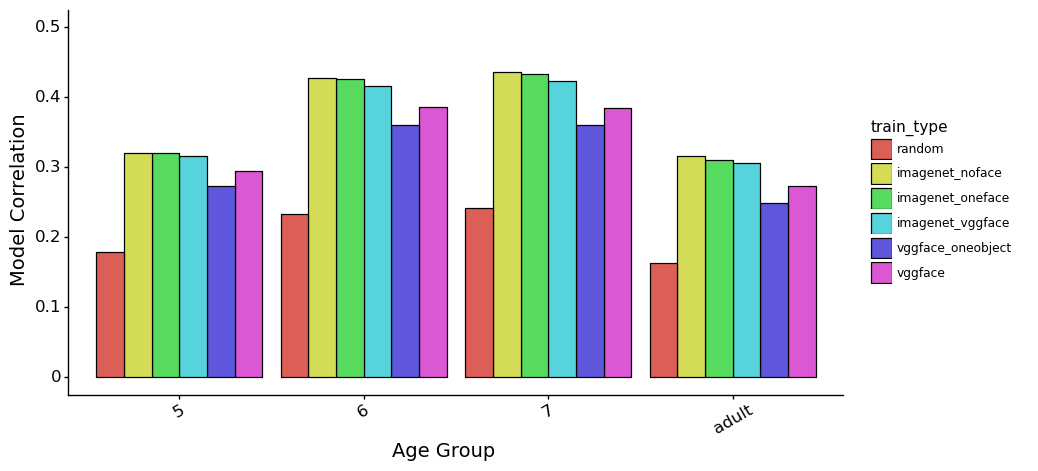


['cornet_z_sl', 'rFFA']


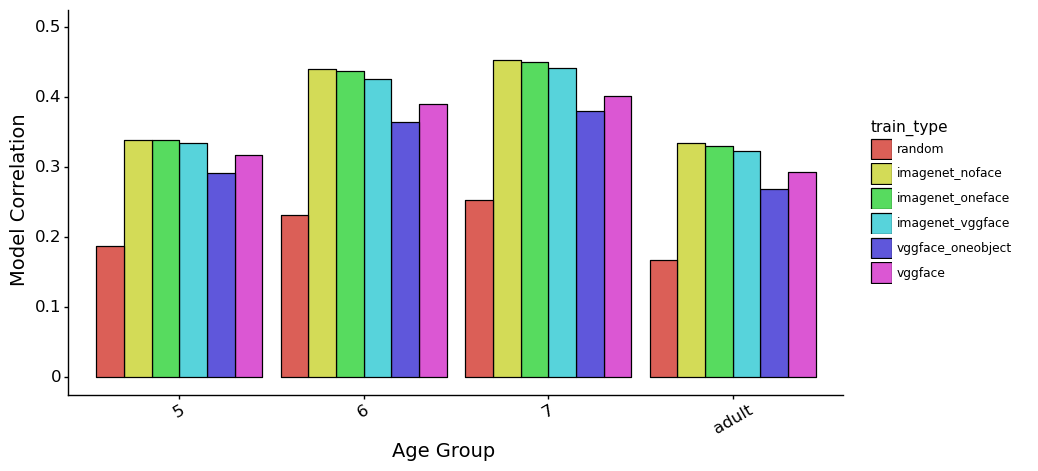

In [70]:
'''
Plot model RSA
'''
exp = 'rsa'

for model_arch in model_archs:
    
    summary_df = pd.DataFrame(columns = ['roi','train_type', 'age', 'corr'])
    
    for roi_vals in enumerate(rois):
        for lr in ['l','r']:
            df = pd.read_csv(f'{results_dir}/{exp}/{model_arch}_rsa_summary.csv')
            df['corr'] = df['corr']*-1 
            roi = f'{lr}{roi_vals[1]}'
            layer = layer_types[roi_vals[0]]
            
            summary_df = df[(df['target_roi']==f'{roi}') & (df['layer']==f'{layer}')]
            summary_df['target_age'] = summary_df['target_age'].astype(str)
            summary_df['target_age'][summary_df['target_age'] == '18'] = 'adult'

            summary_df['target_age'] = pd.Categorical(summary_df['target_age'], categories = ages, ordered = False)
            summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_types, ordered = False)

            print([model_arch, roi])
            
            plot = ggplot(summary_df, aes(x = 'target_age', y = 'corr', fill = 'train_type')) + \
                geom_col(stat='identity',color = 'black', position='dodge') + theme_classic() + \
                xlab('Age Group') + ylab('Model Correlation') + ylim(0,.5) + \
                        theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                        axis_line=element_line(), 
                                                                                        panel_border=element_blank(),
                                                                                        figure_size = (10, 5))
            
            print(plot)
            del plot


In [ ]:
"""
Plot model movie RDMs
"""

data_dir = f"/lab_data/behrmannlab/vlad/ginn/modelling/rdms"


#training info
model_archs = ['cornet_z_cl']
vid = 'DM-clip'
'''
set model params
'''

train_types = ['imagenet_noface', 'imagenet_oneface', 'imagenet_vggface', 'vggface_oneobject', 'vggface', 'random']

train_dir = f'/lab_data/behrmannlab/image_sets/'
#n_classes = len(glob(f'{args.data}/train/*'))
#layer =['aIT','pIT'] #set in descending order
layer_type = ['aIT']

for model_arch in model_archs:
    for train_type in train_types:
        for layer in layer_type:
            print(f'{model_arch}_{train_type}_{layer}')
            rdm = np.load(f'{data_dir}/{model_arch}_{train_type}_{layer}_{vid}_rdm.npy')
            sns.heatmap(rdm)
            plt.pause(0.001)



In [21]:
"""
Model setup

"""

model_type = ['cornet_z_cl', 'cornet_z_sl']

train_type = ['random','imagenet_noface', 'imagenet_oneface',
'imagenet_vggface', 'vggface_oneobject', 'vggface']

layer_type = [['decoder', 'decoder', 'decoder'],['decoder', 'decoder', 'decoder']]
sublayer_type = [['avgpool', 'linear','l2norm'],['avgpool', 'linear','output']]


seed = 1

suf = ''

In [28]:
"""
Plot classification mean data
"""
exp = 'classify'

cond = ['upright','inverted']
test_type = ['objects', 'faces']

suf = ''

for mm in enumerate(model_type):
    for ll in sublayer_type[mm[0]]:
        
        summary_df = pd.DataFrame(columns = ['arch','train_type','image_type', 'condition', 'acc', 'se'])
        for trt in train_type:
            for tt in test_type:
                for cc in cond:
                    
                    curr_df = pd.read_csv(f'{results_dir}/{exp}/{mm[1]}_{trt}_{ll}_{tt}_{cc}{suf}.csv')
                    curr_data = pd.Series([mm[1],trt,tt,cc, curr_df['acc'].mean(), curr_df['acc'].sem()],
                                            index = summary_df.columns)
                    summary_df = summary_df.append(curr_data, ignore_index=True)

            #summary_df = pd.concat([summary_df, curr_data])
        summary_df['acc'] = summary_df['acc'].astype(float)
        summary_df['se'] = summary_df['se'].astype(float)

        summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
        summary_df['image_type'] = pd.Categorical(summary_df['image_type'], categories = test_type, ordered = False)
        summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_type, ordered = False)


#plot = ggplot(summary_df, aes(x = 'model', y = 'acc', fill = 'image_type')) + geom_col(stat='identity', position='dodge') + \
#     lims(y=(0, .5))
        print([mm[1], ll])
        plot = ggplot(summary_df, aes(x = 'train_type', y = 'acc', color = 'condition')) + \
            geom_linerange(aes(x='train_type',  ymax = 'acc + se', ymin = 'acc - se', linetype = 'image_type'), size = 1,position=position_dodge2(width=.5)) + \
            geom_point(aes(shape = 'image_type'), size = 4, fill = 'White', stroke = 1,position=position_dodge2(width=.5)) + \
            geom_hline(yintercept=.03, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Classification Accuracy') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (10, 5))

        print(plot)
        del plot
        


NameError: name 'model_type' is not defined

['cornet_z_cl', 'cropped_face', 'avgpool']


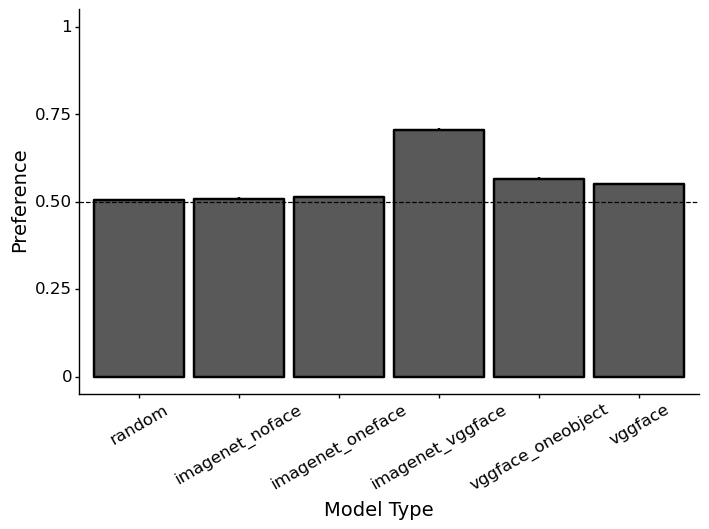


['cornet_z_cl', 'schematic', 'avgpool']


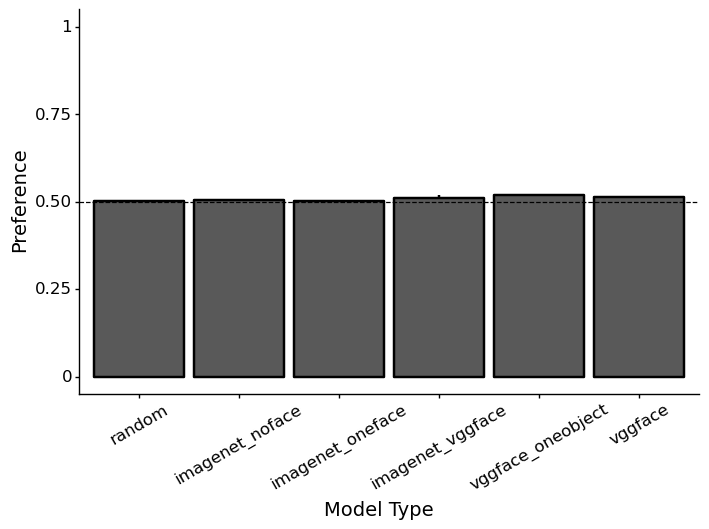


['cornet_z_cl', 'au', 'avgpool']


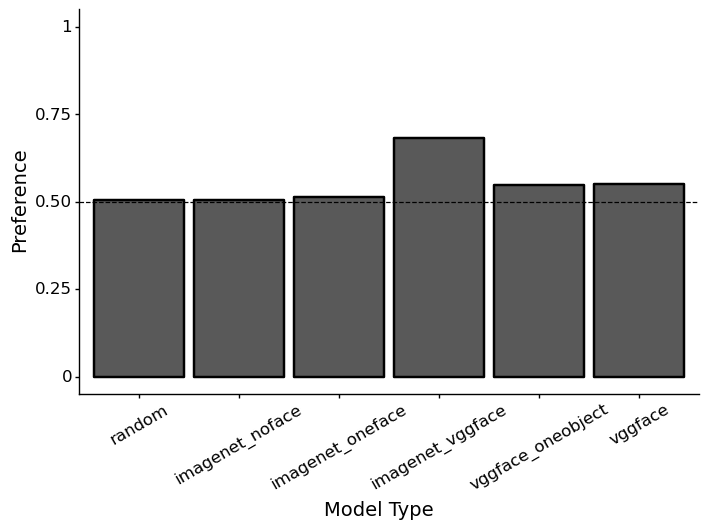


['cornet_z_cl', 'cropped_face', 'linear']


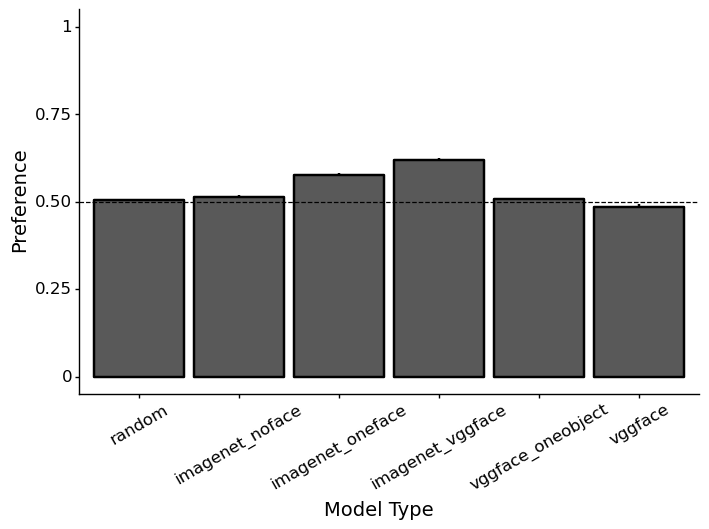


['cornet_z_cl', 'schematic', 'linear']


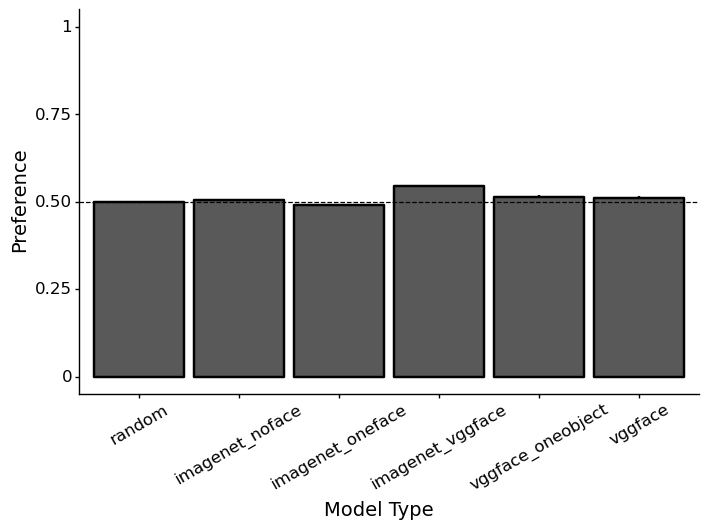


['cornet_z_cl', 'au', 'linear']


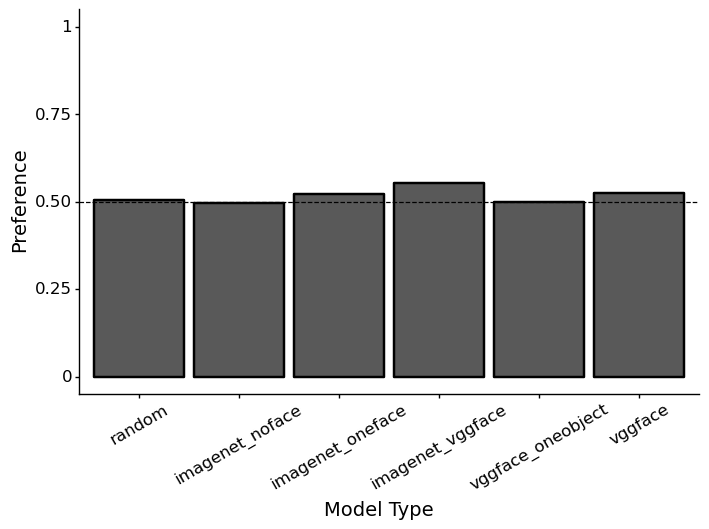


['cornet_z_cl', 'cropped_face', 'l2norm']


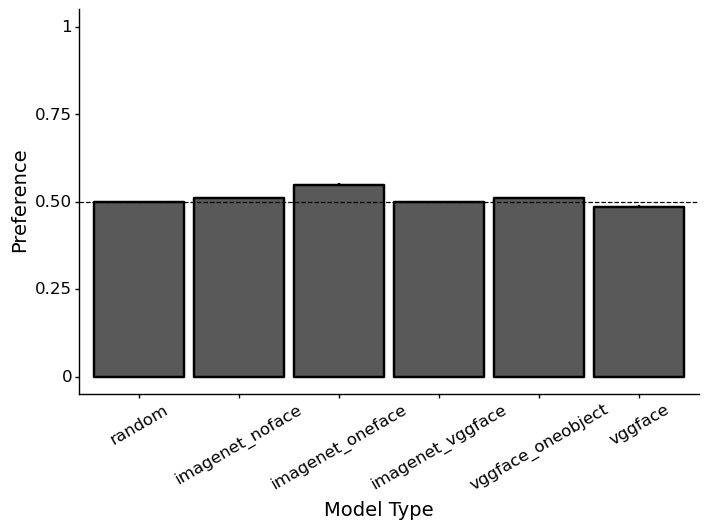


['cornet_z_cl', 'schematic', 'l2norm']


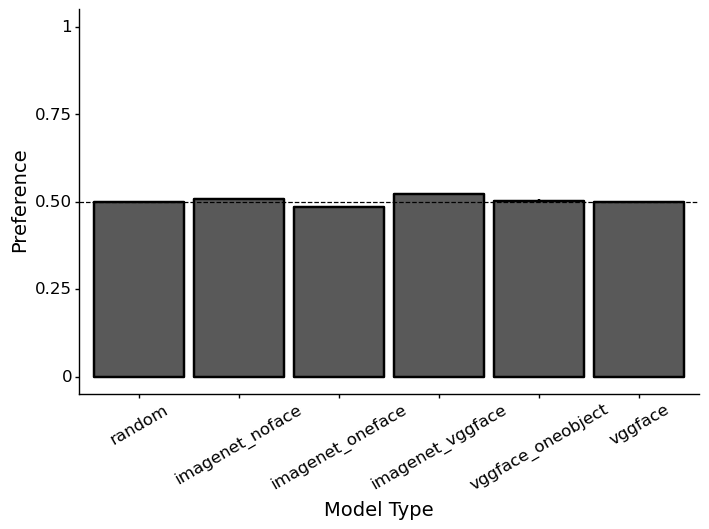


['cornet_z_cl', 'au', 'l2norm']


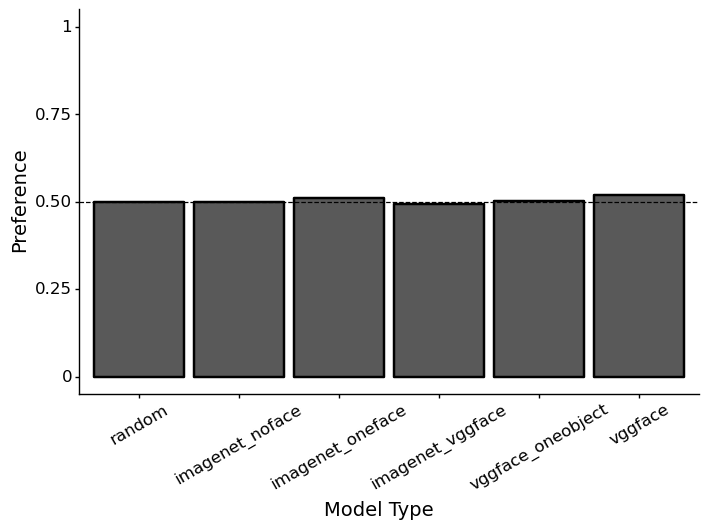


['cornet_z_sl', 'cropped_face', 'avgpool']


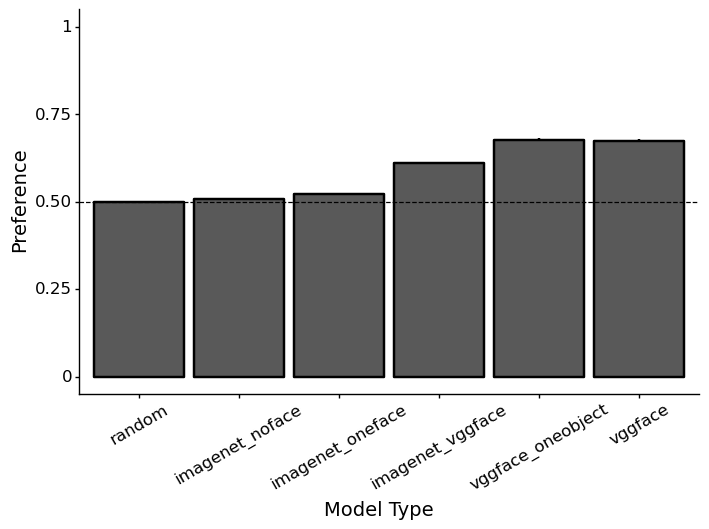


['cornet_z_sl', 'schematic', 'avgpool']


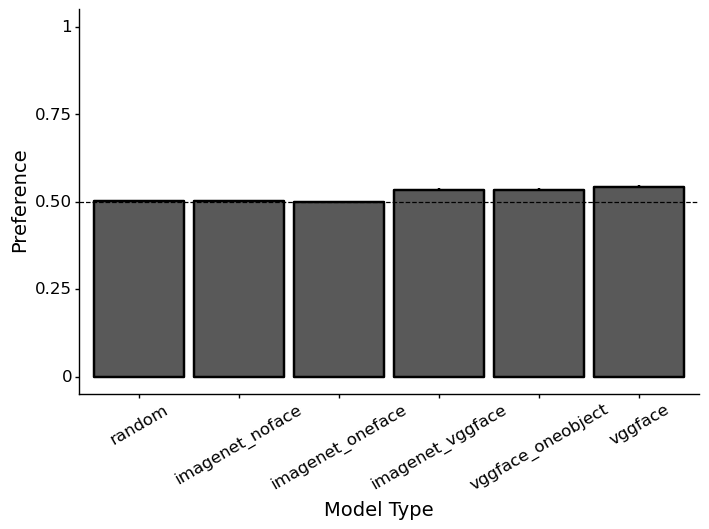


['cornet_z_sl', 'au', 'avgpool']


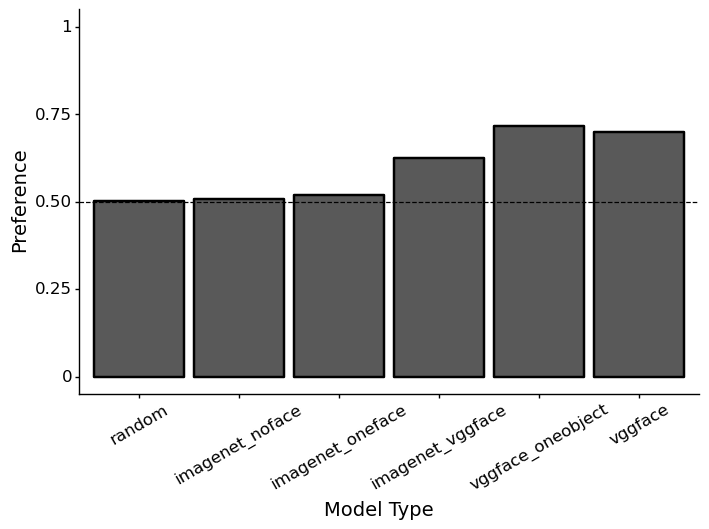


['cornet_z_sl', 'cropped_face', 'linear']


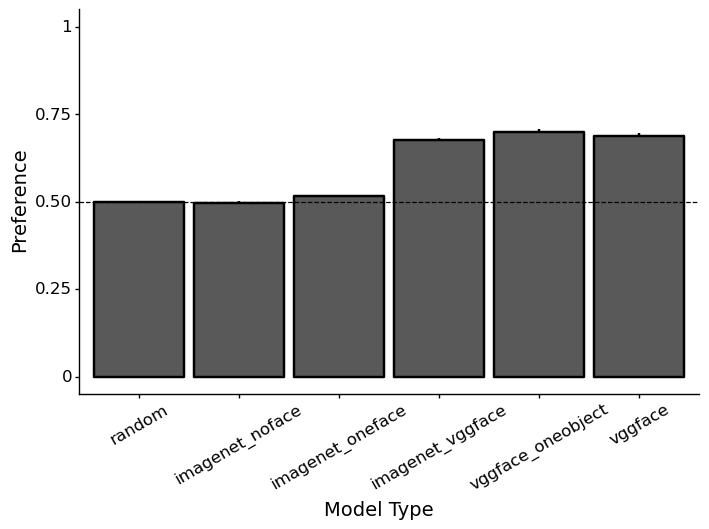


['cornet_z_sl', 'schematic', 'linear']


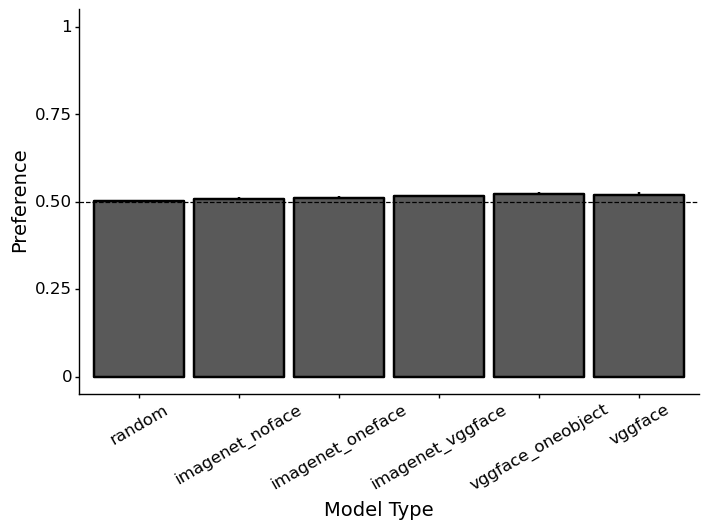


['cornet_z_sl', 'au', 'linear']


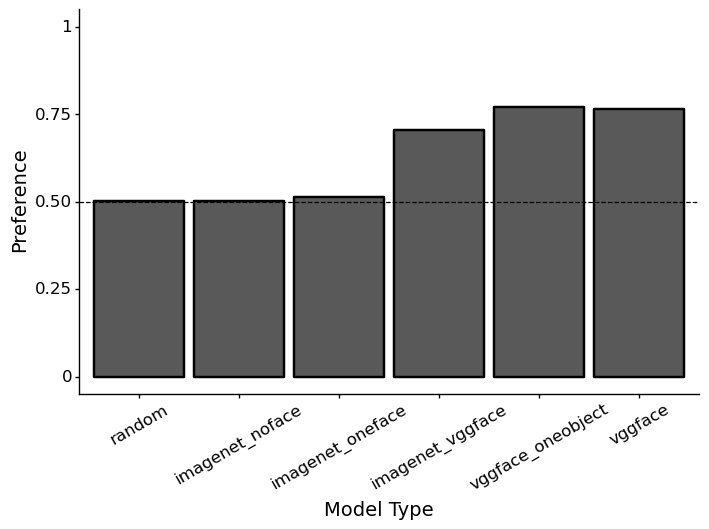


['cornet_z_sl', 'cropped_face', 'output']


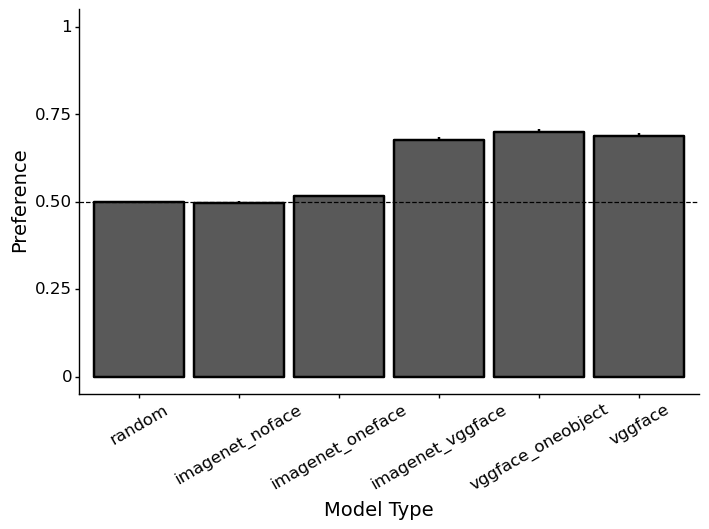


['cornet_z_sl', 'schematic', 'output']


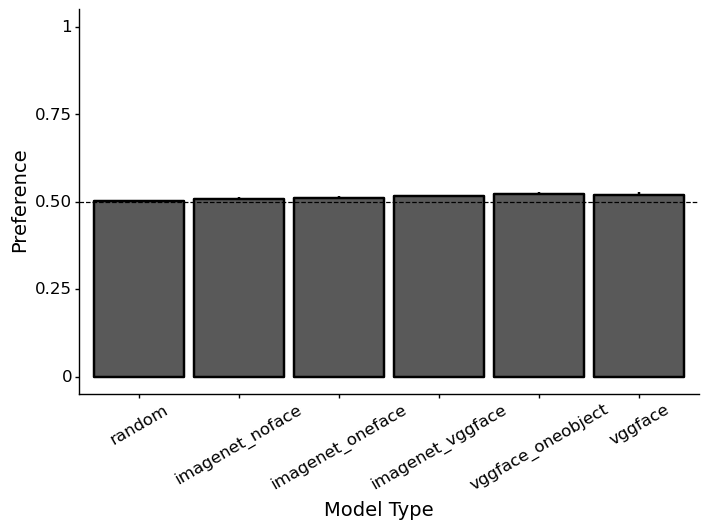


['cornet_z_sl', 'au', 'output']


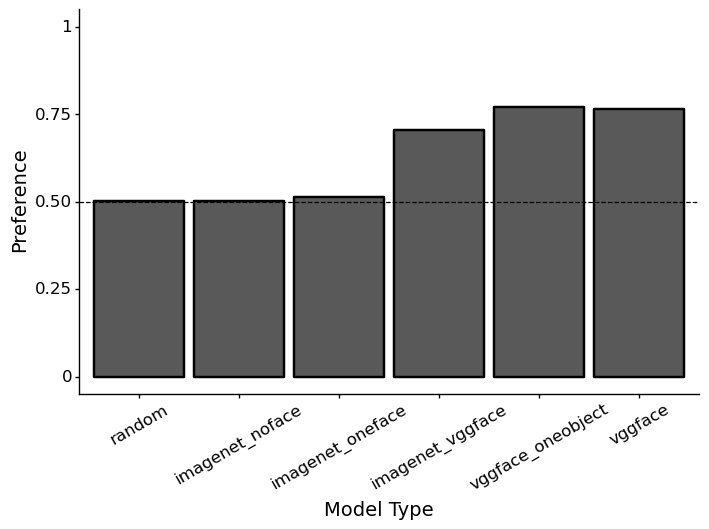

In [28]:
"""
Plot inversion preference mean data
"""
exp = 'inversion_pref'


cond = ['upright','inverted']
test_type = ['cropped_face','schematic','au']

suf = ''

for mm in enumerate(model_type):
    for ll in sublayer_type[mm[0]]:
        for tt in test_type:
            summary_df = pd.DataFrame(columns = ['arch','train_type', 'pref', 'ci_low', 'ci_high'])
            for trt in train_type:
            
            
                curr_df = pd.read_csv(f'{results_dir}/{exp}/{mm[1]}_{trt}_{ll}_{tt}{suf}.csv')
                curr_df = curr_df.loc[curr_df['test_stim'] == tt]
                
                curr_data = pd.Series([mm[1],trt,curr_df['pref'], curr_df['ci_high'],curr_df['ci_low'] ],
                                        index = summary_df.columns)
                summary_df = summary_df.append(curr_data, ignore_index=True)

                #summary_df = pd.concat([summary_df, curr_data])

            summary_df['pref'] = summary_df['pref'].astype(float)
            summary_df['ci_high'] = summary_df['ci_high'].astype(float)
            summary_df['ci_low'] = summary_df['ci_low'].astype(float)

            #summary_df['condition'] = pd.Categorical(summary_df['condition'], categories = cond, ordered = False)
            summary_df['train_type'] = pd.Categorical(summary_df['train_type'], categories = train_type, ordered = False)
            print([mm[1],tt, ll])

            plot = ggplot(summary_df, aes(x = 'train_type', y = 'pref')) + \
                    geom_linerange(aes(x='train_type',  ymax = 'ci_high', ymin = 'ci_low'), size = 1) + \
                    geom_col(stat='identity', size = 1, color = 'Black') + ylim(0,1) + \
                    geom_hline(yintercept=.5, linetype = 'dashed') + theme_classic() + xlab('Model Type') + ylab('Preference') + \
                    theme(text = element_text(color ='black'), axis_text_x= element_text(angle = 30, size = 12),axis_text_y= element_text(size = 12),axis_title=element_text(size = 14),
                                                                                    axis_line=element_line(), 
                                                                                    panel_border=element_blank(),
                                                                                    figure_size = (8, 5))

            print(plot)
            del plot
            